In [72]:
import pandas as pd
import matplotlib.pyplot as plt

# importeer csv bestand
CO2_countries = pd.read_csv("/content/sample_data/co2_emissions.csv")

In [73]:
# Set index to country name
CO2_countries.set_index("Country", inplace = True)

# remove first 3 rows because those are not countries
CO2_countries = CO2_countries.loc["Afghanistan":]

# remove row of European Union
CO2_countries = CO2_countries.drop("European Union",axis = "index")

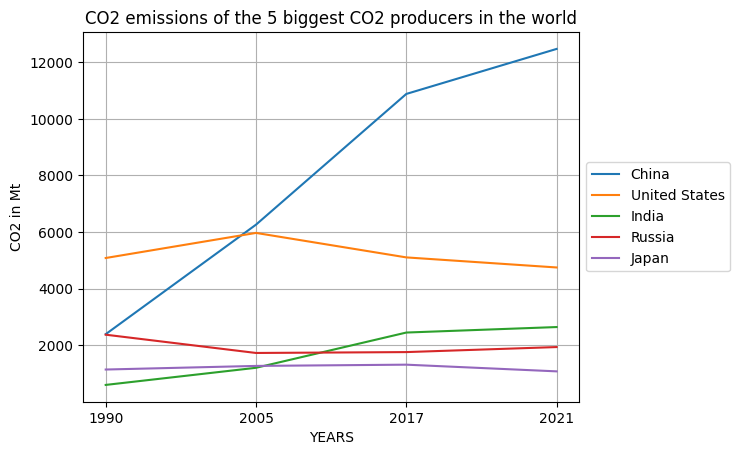

In [74]:
# Graph 1: CO2 of the bigger countries

# sort the table and take the first 5 countries
CO2_top5 = CO2_countries.sort_values('2021',ascending=False).head(5)

# plot Graph 1
fig, ax = plt.subplots()
x = CO2_top5.columns[0:]

for i in range(5):
  ax.plot(x,CO2_top5.iloc[i,0:] ,label = CO2_top5.index.values[i])

ax.set_xlabel('YEARS')
ax.set_ylabel('CO2 in Mt')
ax.set_title('CO2 emissions of the 5 biggest CO2 producers in the world')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.grid()

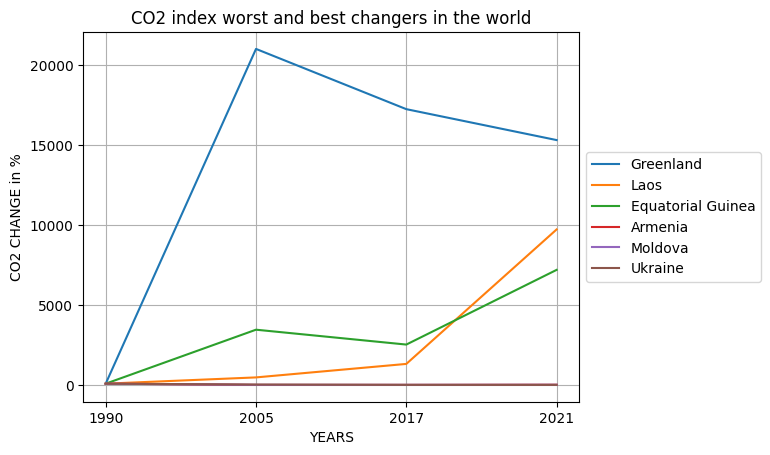

In [75]:
# Graph 2: worst and best changers

# Calc the index changes for 1990, 2005, 2017 and 2021
index_1990 = 100
index_2005 = (CO2_countries.loc[:,'2005'] / CO2_countries.loc[:,'1990'])*100
index_2017 = (CO2_countries.loc[:,'2017'] / CO2_countries.loc[:,'1990'])*100
index_2021 = (CO2_countries.loc[:,'2021'] / CO2_countries.loc[:,'1990'])*100

# create an empty table with same index as CO2_countries
CO2_change_countries = pd.DataFrame(index=CO2_countries.index)

# create in for the new table new columns for the change from 1990 to 2021
CO2_change_countries['1990'] = index_1990
CO2_change_countries['2005'] = index_2005
CO2_change_countries['2017'] = index_2017
CO2_change_countries['2021'] = index_2021

# sort the table and select first 3 and last 3 of the table
CO2_top3 = CO2_change_countries.sort_values('2021',ascending=False).head(3)
CO2_bottom3 = CO2_change_countries.sort_values('2021',ascending=False).tail(3)

# concat the rows of both tables together
CO2_top3_bottom3 = pd.concat([CO2_top3, CO2_bottom3])

# plot the table of dataframe 'CO2_top3_bottom3'
fig, ax = plt.subplots()
x = CO2_top3_bottom3.columns[0:]

for i in range(6):
  ax.plot(x,CO2_top3_bottom3.iloc[i,0:] ,label=CO2_top3_bottom3.index.values[i])

ax.set_xlabel('YEARS')
ax.set_ylabel('CO2 CHANGE in %')
ax.set_title('CO2 index worst and best changers in the world')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.grid()

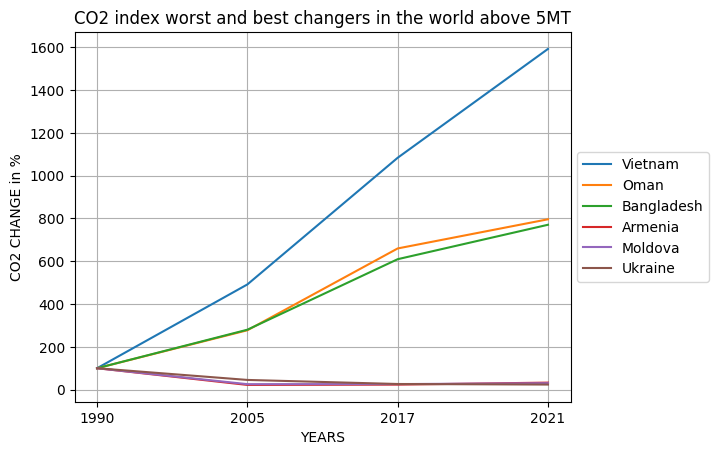

In [76]:
# Graph 3: worst and best changers for countries with more than 5MT CO2 in 1990

# get countries with more than 5MT CO2 in 1990
CO2_5mt_countries = CO2_countries.loc[CO2_countries.loc[:,'1990'] > 5]

# Calc the index changes for 1990, 2005, 2017 and 2021
index_1990_5mt = 100
index_2005_5mt = (CO2_5mt_countries.loc[:,'2005'] / CO2_5mt_countries.loc[:,'1990'])*100
index_2017_5mt = (CO2_5mt_countries.loc[:,'2017'] / CO2_5mt_countries.loc[:,'1990'])*100
index_2021_5mt = (CO2_5mt_countries.loc[:,'2021'] / CO2_5mt_countries.loc[:,'1990'])*100

# create an empty table with same index as CO2_5mt_countries
CO2_change_5mt_countries = pd.DataFrame(index=CO2_5mt_countries.index)

# create in for the new table new columns for the change from 1990 to 2021
CO2_change_5mt_countries['1990'] = index_1990_5mt
CO2_change_5mt_countries['2005'] = index_2005_5mt
CO2_change_5mt_countries['2017'] = index_2017_5mt
CO2_change_5mt_countries['2021'] = index_2021_5mt

# sort the table and select first 3 and last 3 of the table
CO2_top3_5mt = CO2_change_5mt_countries.sort_values('2021',ascending=False).head(3)
CO2_bottom3_5mt = CO2_change_5mt_countries.sort_values('2021',ascending=False).tail(3)

# concat the rows of both tables together
CO2_top3_bottom3_5mt = pd.concat([CO2_top3_5mt, CO2_bottom3_5mt])

# plot the table of dataframe 'CO2_top3_bottom3_5mt'
fig, ax = plt.subplots()
x = CO2_top3_bottom3_5mt.columns[0:]

for i in range(6):
  ax.plot(x,CO2_top3_bottom3_5mt.iloc[i,0:] ,label=CO2_top3_bottom3_5mt.index.values[i])

ax.set_xlabel('YEARS')
ax.set_ylabel('CO2 CHANGE in %')
ax.set_title('CO2 index worst and best changers in the world above 5MT')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.grid()